In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

## Introducerea curbei M-N

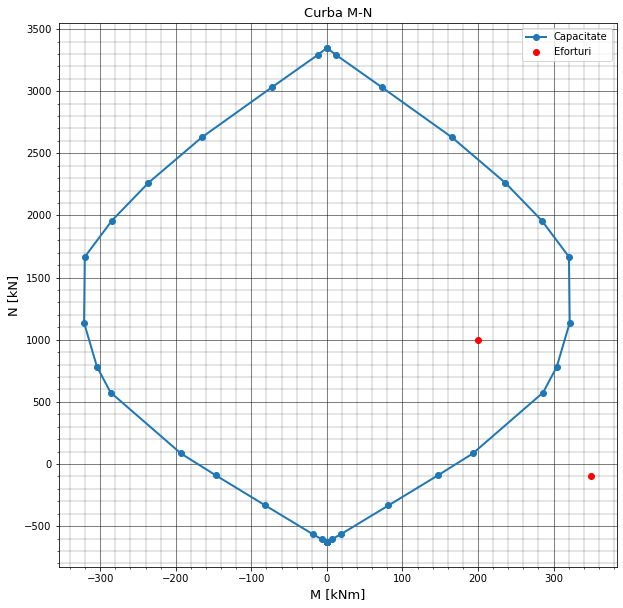

In [2]:
curb = np.loadtxt('st60x60.txt',skiprows=1)
N = curb[0:,0]
M = curb[0:,1]

Ned = [1000,-100]
Med = [200,350]

ax = plt.subplot(1,1,1)
p1 = ax.plot(M, N, 'o-', label='Capacitate', linewidth=2)
p2 = ax.plot(Med, Ned, 'ro', label='Eforturi', linewidth=2)
l1 = ax.legend(loc = 'best')
g1 = ax.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
g2 = ax.grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
plt.title('Curba M-N',size = 13)
plt.ylabel('N [kN]',size = 13)
plt.xlabel('M [kNm]',size = 13)
ax.minorticks_on()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Ned =  [308.97, 1994.76]
Valoarea cautata este pentru momente pozitive: [235.67 278.78] kNm
Valoarea cautata este pentru momente negative: [-235.67 -278.78] kNm


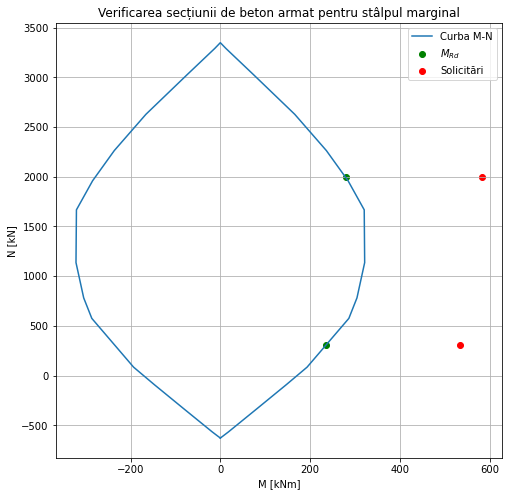

In [4]:
# Deducearea lui M in functie de Ned

# print('Calcularea lui MRd în funcție de Ned')
# Ned = float(input('Ned = '))

Ned = [308.97,1994.76]
Med = [532.5,582.16]
MRd_poz = np.zeros_like(Ned)
MRd_neg = np.zeros_like(Ned)

for i in range(len(M)-1):
    for j in range(len(Ned)):
        if N[i] <= Ned[j] and Ned[j] <=N[i+1]:
            MRd_poz[j] = ((M[i+1]-M[i])*(Ned[j]-N[i])+M[i]*(N[i+1]-N[i]))/(N[i+1]-N[i])
        if N[i] >= Ned[j] and Ned[j] >= N[i+1]:
            MRd_neg[j] = ((M[i+1]-M[i])*(Ned[j]-N[i])+M[i]*(N[i+1]-N[i]))/(N[i+1]-N[i])
print('Ned = ',Ned)
print('Valoarea cautata este pentru momente pozitive:',np.round(MRd_poz,2),'kNm')
print('Valoarea cautata este pentru momente negative:',np.round(MRd_neg,2),'kNm')

# Deducearea lui N in functie de Med

# print('Calcularea lui MRd în funcție de Med')
# Med = float(input('Med = '))

# for i in range(len(M)-1):
#     if M[i] <= Med and Med <=M[i+1]:
#         Nc = (Med-M[i])*(N[i+1]-N[i])/(M[i+1]-M[i])+N[i]
#         print('Valoarea cautata minima este:',np.round(Nc,2),'kNm')
#     if M[i] >= Med and Med >=M[i+1]:
#         Nc = (Med-M[i])*(N[i+1]-N[i])/(M[i+1]-M[i])+N[i]
#         print('Valoarea cautata maxima este:',np.round(Nc,2),'kNm')

plt.figure(figsize = (8,8))
plt.plot(M,N,label = 'Curba M-N')
MRd = np.zeros_like(Med)
for i in range(len(Med)):
    if Med[i] >=0:
        MRd[i] = MRd_poz[i]
    else:
        MRd[i] = MRd_neg[i]

plt.scatter(MRd,Ned,color='green',label = '$M_{Rd}$')
plt.scatter(Med,Ned,color='red',label='Solicitări')

#for xy in zip(MRd, Ned):                                            # <--
#    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')         # <--
       
plt.grid('True')
#plt.tight_layout()
plt.legend(loc = 'best',prop={'size': 10})
plt.xlabel('M [kNm]')
plt.ylabel('N [kN]')
plt.title('Verificarea secțiunii de beton armat pentru stâlpul marginal')
plt.savefig('Verificare.eps')